In [1]:
import numpy as np
import pandas as pd
import math
import collections
import seaborn as sns
from itertools import permutations

In [2]:
df=pd.read_csv('language.csv')
df=df.dropna()
df['text']=df['text'].astype(str)
df['language']=df['language'].astype(str)

In [3]:
pun = ("?","-",".",",","\''",';',"/",'!')
vow=['a','e','i','o','u']
duo_vow=['aa','ee','ii','oo','uu']
con_vow=[''.join(p) for p in permutations(vow,2)]
dutch_com=['ij']

In [4]:
df['word_count']=df['text'].apply(lambda x: len(x.split()))
df['character_count']=df['text'].apply(lambda x: len(x.replace(" ","")))
df['word_density']=df['word_count']/(df['character_count']+1)
df['punc_count']=df['text'].apply(lambda x: len([a for a in x if a in pun]))
df['vow_char_count']=df['text'].apply(lambda x:len([a for a in x if a in vow]))
df['v_char_count']=df['text'].apply(lambda x:len([a for a in x if a.casefold()=='v']))
df['w_char_count']=df['text'].apply(lambda x:len([a for a in x if a.casefold()=='w']))
df['ij_char_count']=df['text'].apply(lambda x:sum([any(a_b in a for a_b in dutch_com) for a in x.split()]))
df['duo_vow_count']=df['text'].apply(lambda x:sum([any(a_b in a for a_b in duo_vow) for a in x.split()]))
df['con_vow_count']=df['text'].apply(lambda x:sum([any(a_b in a for a_b in con_vow) for a in x.split()]))
df['vow_char_count']=df['text'].apply(lambda x: len([a for a in x if a in vow]))
df['vow_density']=df['vow_char_count']/df['word_count']
df['capitals']=df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['cap_vs_character']=df['capitals']/df['character_count']
df['exclamation_count']=df['text'].apply(lambda x: x.count('!'))
df['Question_count']=df['text'].apply(lambda x: x.count('?'))
df['unique_words']=df['text'].apply(lambda x: len(set(w for w in x.split())))
df['repeat_words']=df['text'].apply(lambda x: len([w for w in collections.Counter(x.split()).values()]))
df['words_vs_unique']=df['unique_words']/df['word_count']
df['encode']=np.nan

for i in range(len(df)):
    try:
        df['text'].iloc[i].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        df['encode'].iloc[i]=0
    else:
        df['encode'].iloc[i]=1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\4075200953.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encode'].iloc[i]=1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\4075200953.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encode'].iloc[i]=0


In [5]:
df

,text,language,word_count,character_count,word_density,punc_count,vow_char_count,v_char_count,w_char_count,ij_char_count,...,con_vow_count,vow_density,capitals,cap_vs_character,exclamation_count,Question_count,unique_words,repeat_words,words_vs_unique,encode
0,Ship shape and Bristol fashion,English,5,26,0.185185,0,9,0,0,0,...,1,1.800000,2,0.076923,0,0,5,5,1.0,1.0
1,Know the ropes,English,3,12,0.230769,0,4,0,1,0,...,0,1.333333,1,0.083333,0,0,3,3,1.0,1.0
2,Graveyard shift,English,2,14,0.133333,0,4,1,0,0,...,0,2.000000,1,0.071429,0,0,2,2,1.0,1.0
3,Milk of human kindness,English,4,19,0.200000,0,6,0,0,0,...,0,1.500000,1,0.052632,0,0,4,4,1.0,1.0
4,Touch with a barge-pole - Wouldn't,English,6,29,0.200000,2,10,0,2,0,...,2,1.666667,2,0.068966,0,0,6,6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Vir kwaadgeld rondloop.,Afrikaans,3,21,0.136364,1,7,1,1,0,...,0,2.333333,1,0.047619,0,0,3,3,1.0,1.0
995,Dog in the manger,English,4,14,0.266667,0,5,0,0,0,...,0,1.250000,1,0.071429,0,0,4,4,1.0,1.0
996,As white as snow,English,4,13,0.285714,0,4,0,2,0,...,0,1.000000,1,0.076923,0,0,4,4,1.0,1.0
997,Geld uit iemand se sak jaag.,Afrikaans,6,23,0.250000,1,10,0,0,0,...,2,1.666667,1,0.043478,0,0,6,6,1.0,1.0


In [6]:
df.groupby('language').mean().T

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\2367961293.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('language').mean().T


language,Afrikaans,English,Nederlands
word_count,10.741228,4.038926,5.576923
character_count,44.758772,16.783893,26.115385
word_density,0.232813,0.224363,0.205403
punc_count,1.530702,0.257718,1.269231
vow_char_count,17.692982,5.877852,10.461538
v_char_count,0.592105,0.130201,0.346154
w_char_count,0.982456,0.288591,0.653846
ij_char_count,0.000000,0.000000,0.153846
duo_vow_count,1.671053,0.166443,1.307692
con_vow_count,2.881579,0.532886,1.346154


In [7]:
df.corr(method='pearson')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12268\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,word_count,character_count,word_density,punc_count,vow_char_count,v_char_count,w_char_count,ij_char_count,duo_vow_count,con_vow_count,vow_density,capitals,cap_vs_character,exclamation_count,Question_count,unique_words,repeat_words,words_vs_unique,encode
word_count,1.000000,0.959496,0.310025,0.701508,0.942607,0.455738,0.573823,-0.004665,0.708136,0.760748,-0.142738,0.426313,-0.455478,0.269324,0.062269,0.986571,0.986571,-0.584532,-0.513655
character_count,0.959496,1.000000,0.082769,0.727573,0.980905,0.492098,0.592566,0.010867,0.741279,0.793386,0.027645,0.435428,-0.492316,0.292365,0.082749,0.950274,0.950274,-0.538606,-0.531594
word_density,0.310025,0.082769,1.000000,0.025261,0.092374,0.002493,0.044920,-0.047352,0.052161,0.055993,-0.743080,0.076819,0.011047,-0.006899,-0.016134,0.329388,0.329388,-0.190143,-0.062175
punc_count,0.701508,0.727573,0.025261,1.000000,0.692430,0.380441,0.382653,0.029589,0.588902,0.586957,0.078218,0.426694,-0.244172,0.277572,0.120823,0.682388,0.682388,-0.406125,-0.418688
vow_char_count,0.942607,0.980905,0.092374,0.692430,1.000000,0.484881,0.570058,0.010450,0.769638,0.845034,0.092561,0.364838,-0.510695,0.269804,0.073316,0.934910,0.934910,-0.538514,-0.515259
v_char_count,0.455738,0.492098,0.002493,0.380441,0.484881,1.000000,0.231065,0.000914,0.366043,0.378016,0.049192,0.275985,-0.218439,0.179326,0.018712,0.453679,0.453679,-0.266867,-0.286527
w_char_count,0.573823,0.592566,0.044920,0.382653,0.570058,0.231065,1.000000,-0.031716,0.485431,0.395888,-0.004206,0.251695,-0.272606,0.171027,0.091583,0.567142,0.567142,-0.303480,-0.314377
ij_char_count,-0.004665,0.010867,-0.047352,0.029589,0.010450,0.000914,-0.031716,1.000000,0.012727,-0.024029,0.040183,-0.017958,-0.048951,-0.006615,-0.007828,-0.001281,-0.001281,0.022186,0.020072
duo_vow_count,0.708136,0.741279,0.052161,0.588902,0.769638,0.366043,0.485431,0.012727,1.000000,0.576042,0.099341,0.243513,-0.370741,0.296946,0.069924,0.705290,0.705290,-0.372540,-0.500698
con_vow_count,0.760748,0.793386,0.055993,0.586957,0.845034,0.378016,0.395888,-0.024029,0.576042,1.000000,0.161219,0.300055,-0.416808,0.172641,0.040434,0.757683,0.757683,-0.434298,-0.468760


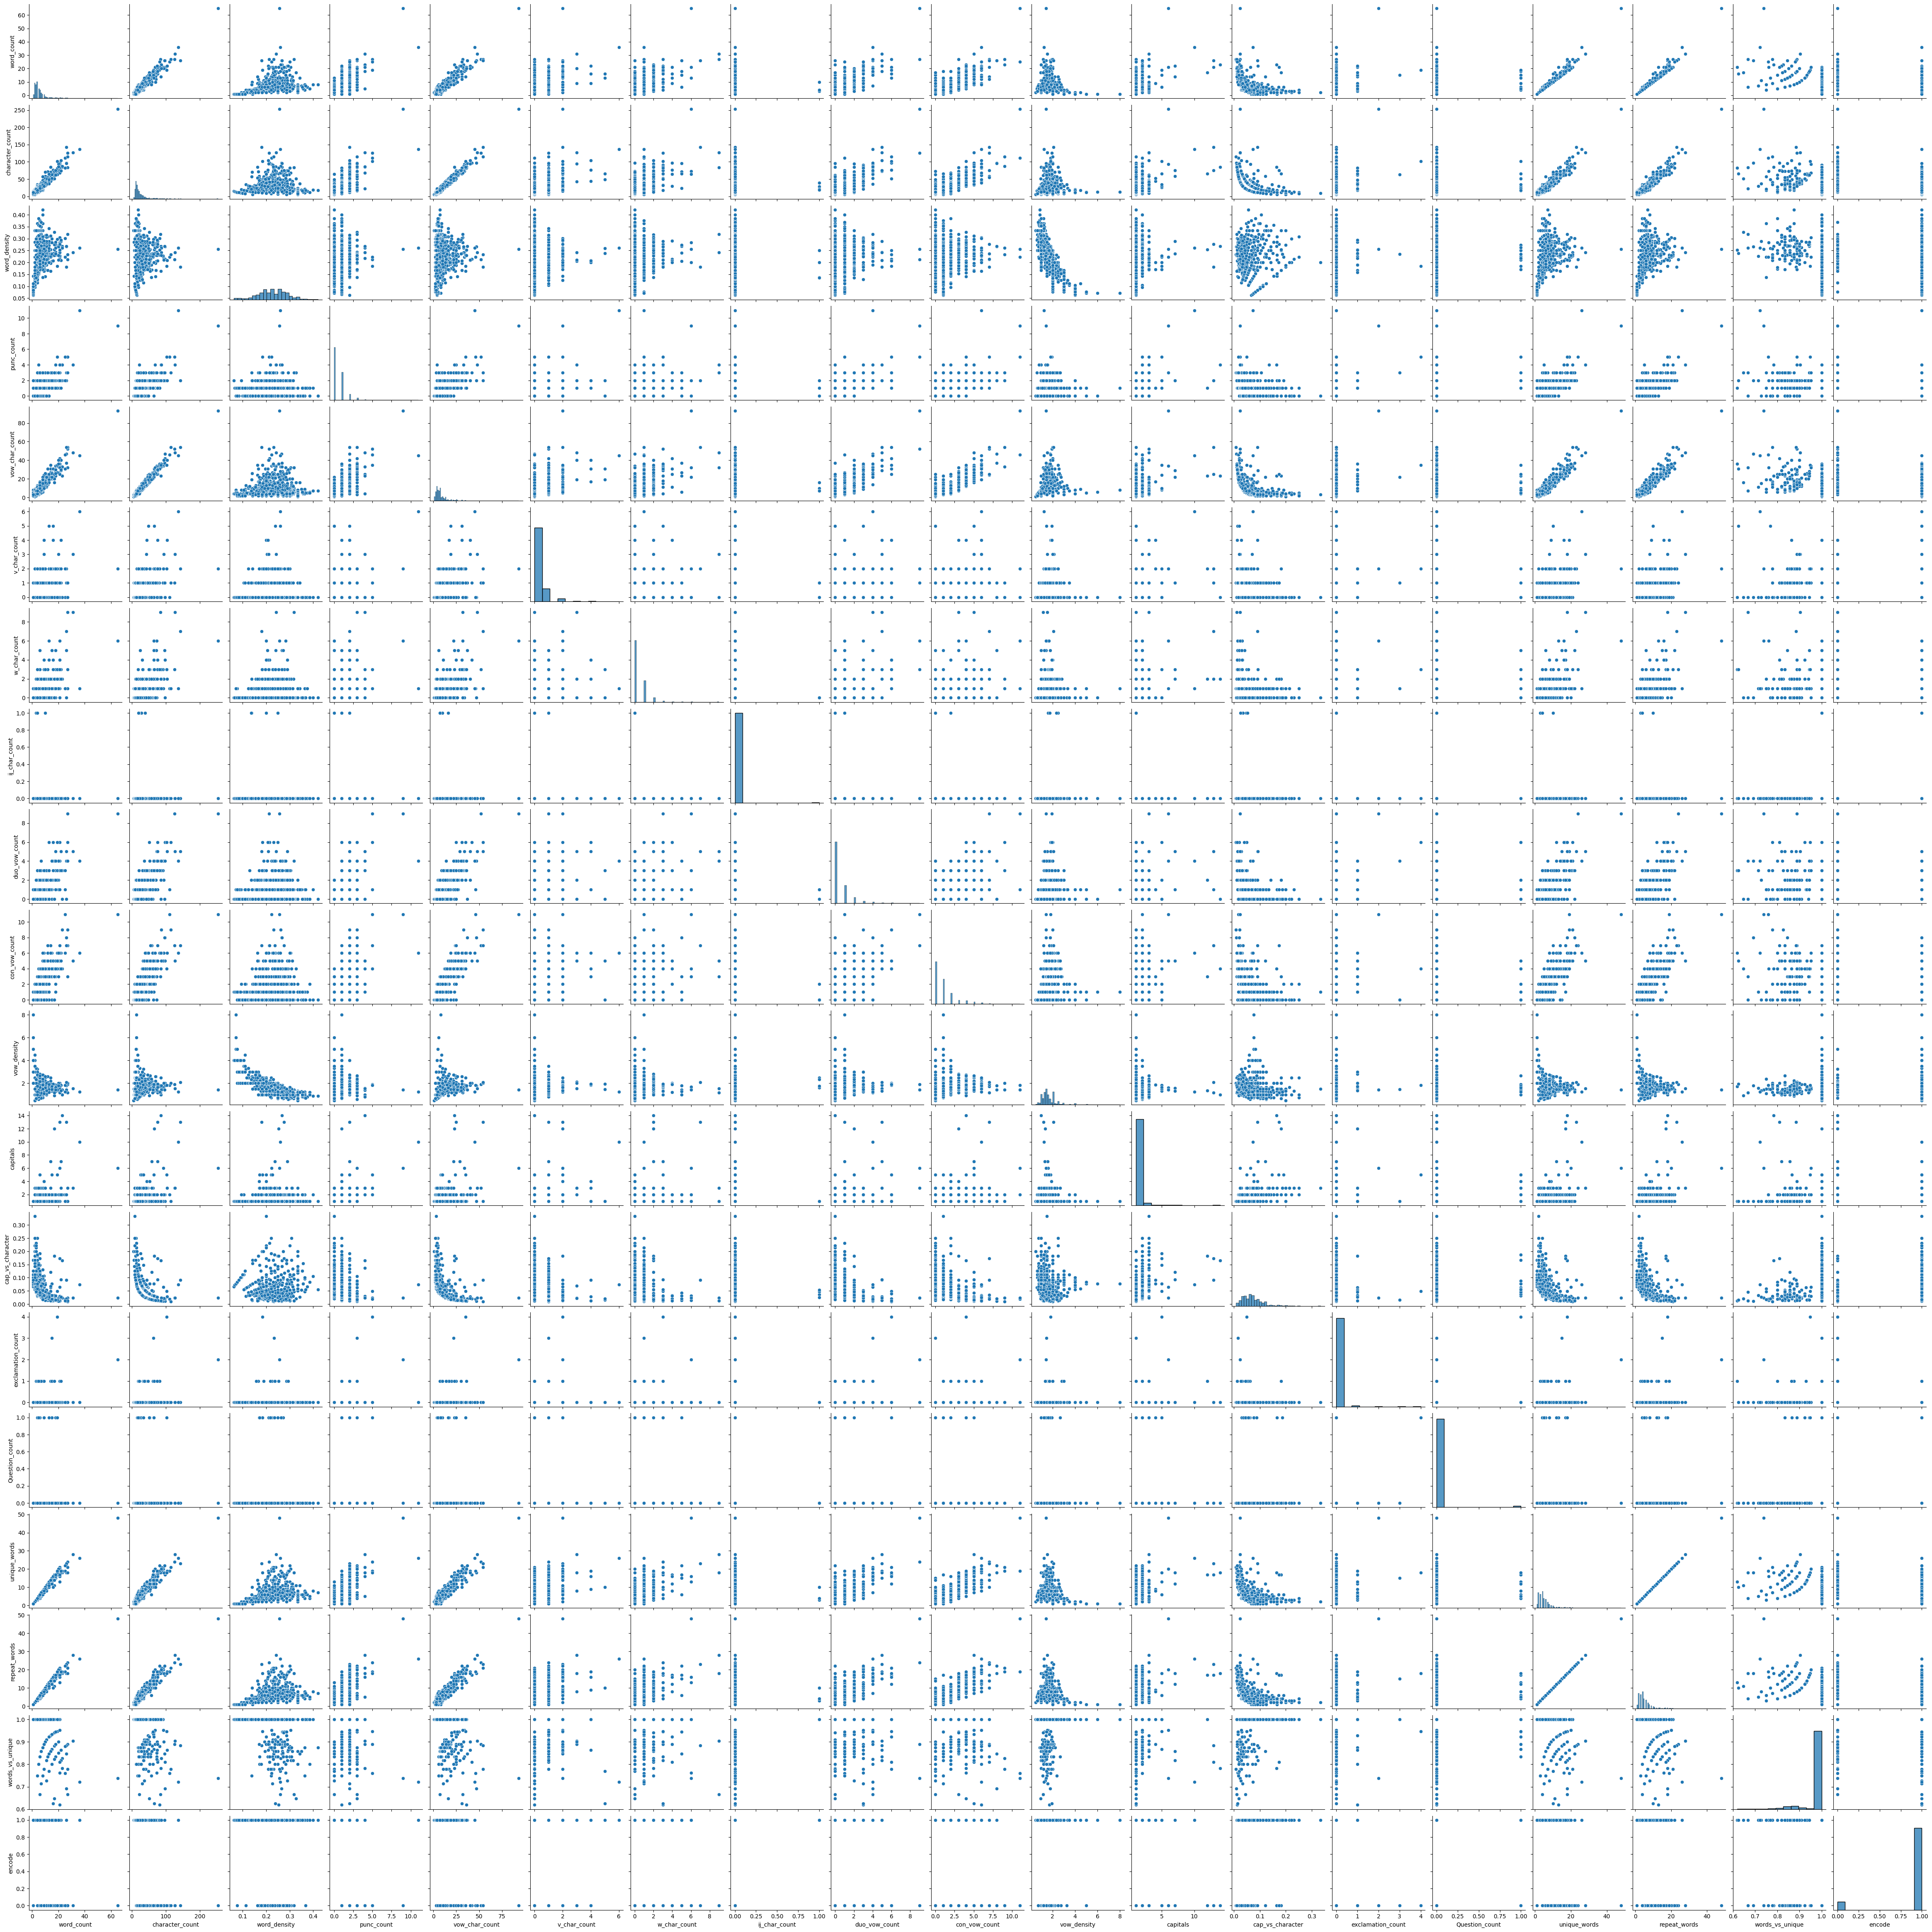

In [8]:
sns.pairplot(df)

In [19]:
from sklearn.model_selection import train_test_split
features_col=list(df.columns)[2:]
x=df[features_col]
y=df[['language']]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [20]:
x_test.shape

(200, 19)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale=StandardScaler()
scale.fit(x_train)

x_train=scale.transform(x_train)
x_test= scale.transform(x_test)

pca=PCA(0.95)

pca.fit(x_train)

print('no of principle component='+str(pca.n_components_))

no of principle component=12


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import pickle

In [23]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)

dt_model="dt_model.pk1"
with open(dt_model, 'wb') as file: 
    pickle.dump(dt_clf, file)

with open (dt_model, 'rb') as file: 
    dt_clf=pickle.load(file)
        
dt_clf

y_predict=dt_clf.predict(x_test)
accuracy_score = accuracy_score(y_test, y_predict)

print(accuracy_score)

0.91


Text(0.5, 1.0, 'Decision tree Accuracy score=91.0%')

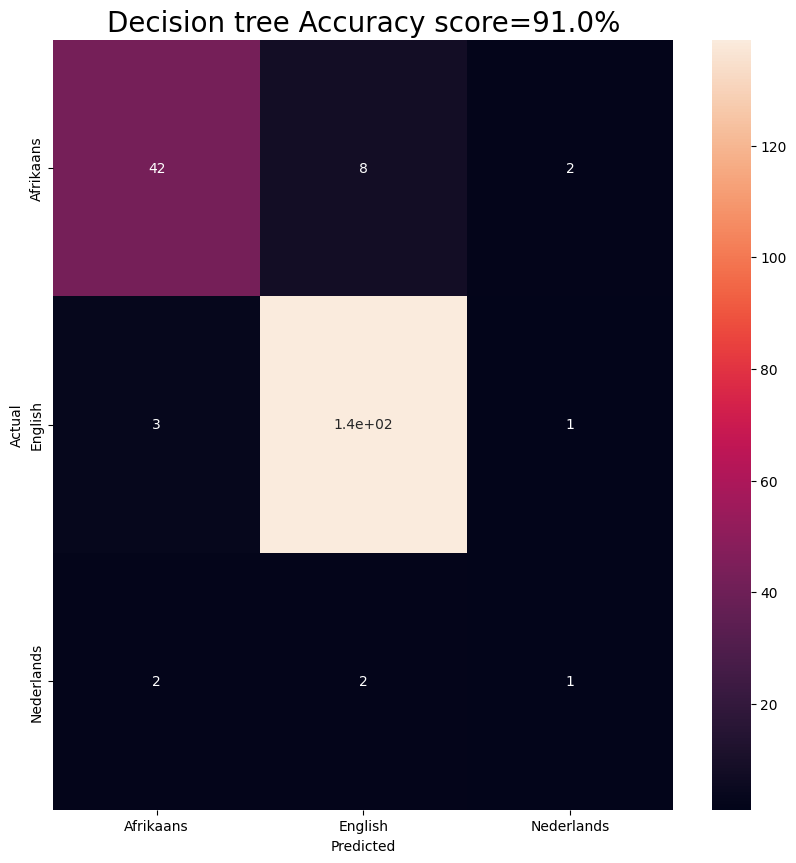

In [24]:
import matplotlib.pyplot as plt
label=['Afrikaans','English','Nederlands']

confusion_matrix_dt=confusion_matrix(y_test,y_predict)

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
sns.heatmap(confusion_matrix_dt, annot=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')

ax.set_xticklabels(label)
ax.set_yticklabels(label)

title = 'Decision tree Accuracy score='+str(round(accuracy_score*100,3))+"%"
plt.title(title, size=20)

In [25]:
confusion_matrix_dt

array([[ 42,   8,   2],
       [  3, 139,   1],
       [  2,   2,   1]], dtype=int64)

In [26]:
print(y_predict)

['English' 'English' 'Nederlands' 'English' 'Afrikaans' 'Afrikaans'
 'English' 'English' 'English' 'English' 'English' 'English' 'Afrikaans'
 'English' 'English' 'Afrikaans' 'English' 'Nederlands' 'English'
 'Afrikaans' 'English' 'English' 'English' 'English' 'English' 'English'
 'English' 'English' 'English' 'Afrikaans' 'English' 'Afrikaans' 'English'
 'English' 'English' 'Afrikaans' 'English' 'Afrikaans' 'English'
 'Afrikaans' 'English' 'Afrikaans' 'English' 'Afrikaans' 'English'
 'Afrikaans' 'English' 'English' 'English' 'English' 'English' 'English'
 'English' 'English' 'English' 'English' 'English' 'Afrikaans' 'English'
 'English' 'English' 'English' 'English' 'English' 'English' 'English'
 'English' 'English' 'English' 'Afrikaans' 'Afrikaans' 'Afrikaans'
 'English' 'English' 'English' 'English' 'English' 'English' 'Afrikaans'
 'English' 'Afrikaans' 'English' 'Afrikaans' 'English' 'Nederlands'
 'English' 'Afrikaans' 'English' 'English' 'Afrikaans' 'English' 'English'
 'English' 'A

<AxesSubplot: >

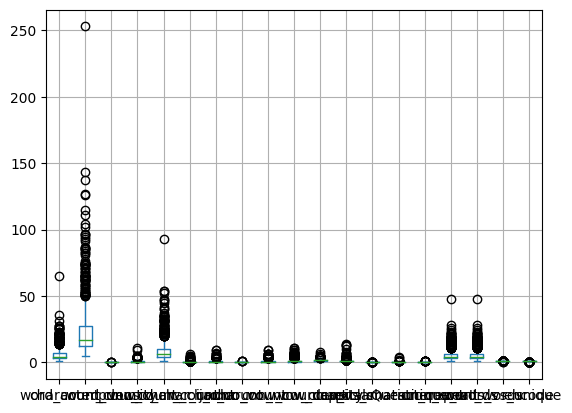

In [27]:
df.plot.box(grid='True')

In [29]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8)# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(x_test)# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.895
